In [14]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb



mnist = load_digits()

#mnist.keys()
#pd.DataFrame(mnist.data).head()
#plt.imshow(mnist.images[0]);

# fig, axes = plt.subplots(2, 10, figsize=(16, 6))
# for i in range(20):
#     axes[i//10, i %10].imshow(mnist.images[i], cmap='gray');
#     axes[i//10, i %10].axis('off')
#     axes[i//10, i %10].set_title(f"target: {mnist.target[i]}")
    
# plt.tight_layout()

# print(mnist.target[0])

X = mnist.data
y = mnist.target

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Criar uma Decision Tree
# clf = DecisionTreeClassifier(random_state=42)

# # Treinar a Decision Tree
# clf.fit(X_train, y_train)

# # Prever as classes para o conjunto de teste
# y_pred = clf.predict(X_test)

# # Imprimir a precisão da Decision Tree
# print("Precisão:", clf.score(X_test, y_test))

# Treinar o modelo de árvore de decisão
clf = DecisionTreeClassifier(max_depth=10, max_features=64, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Treinar o modelo Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, max_features=64, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Treinar o modelo XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'objective': 'multi:softmax', 'num_class': 10, 'max_depth': 10, 'eta': 0.3, 'random_state': 42}
num_round = 100
bst = xgb.train(params, dtrain, num_round)
y_pred_xgb = bst.predict(dtest)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Comparar os resultados
print(f"Acurácia do modelo Árvore de Decisão: {accuracy:.4f}")
print(f"Acurácia do modelo Random Forest: {accuracy_rf:.4f}")
print(f"Acurácia do modelo XGBoost: {accuracy_xgb:.4f}")


Acurácia do modelo Árvore de Decisão: 0.8500
Acurácia do modelo Random Forest: 0.9444
Acurácia do modelo XGBoost: 0.9694


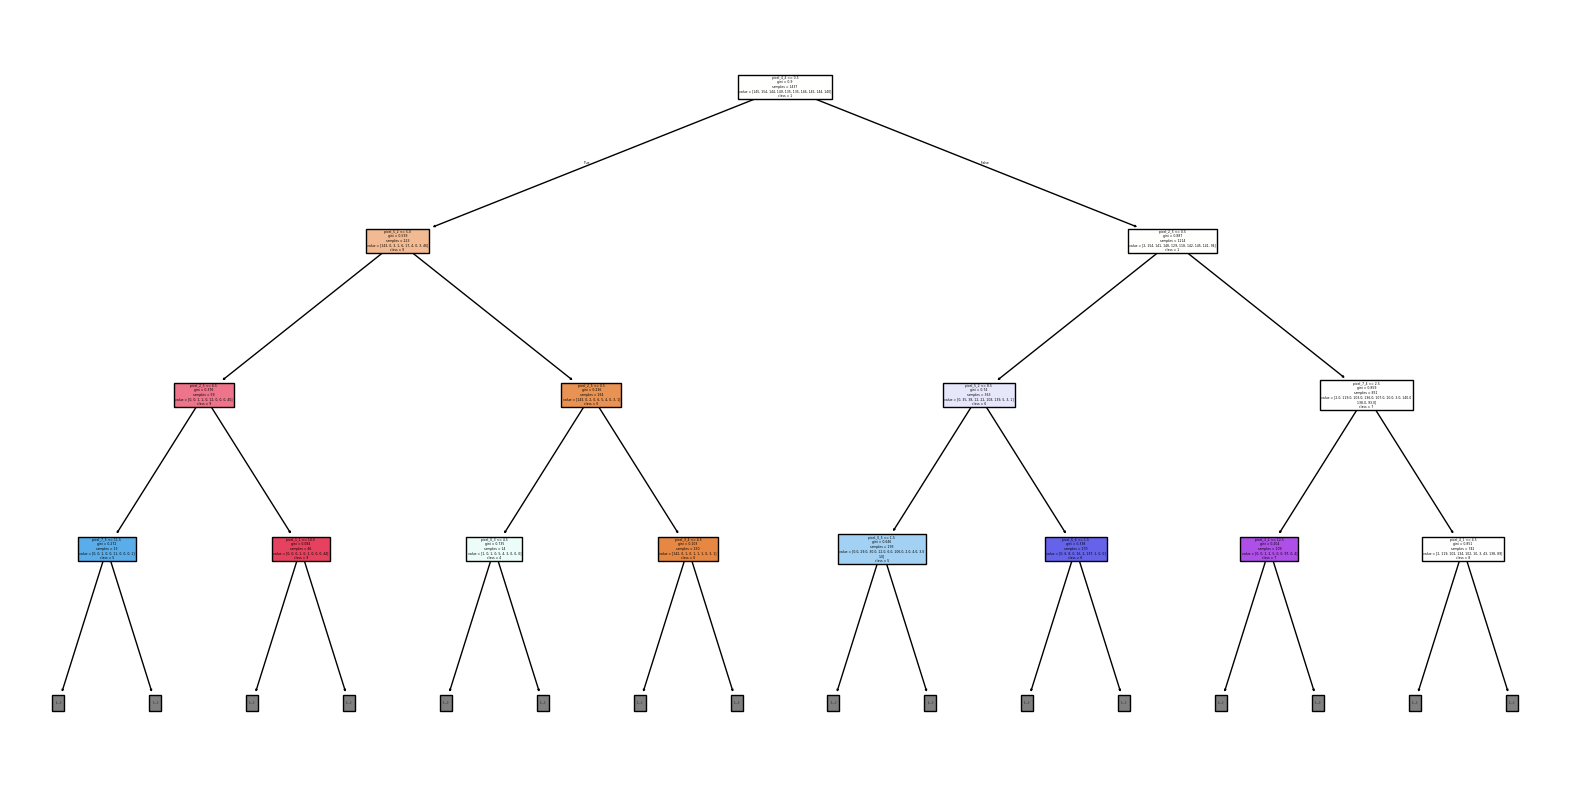

In [15]:
from sklearn.tree import plot_tree

# Visualizar a árvore de decisão
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=mnist.feature_names, class_names=[str(i) for i in range(10)], max_depth=3)
plt.show()

[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 9 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 5 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5]
[6. 9. 3. 7. 2. 1. 5. 2. 5. 2. 1. 9. 4. 0. 4. 2. 3. 7. 8. 8. 4. 3. 9. 7.
 5. 6. 3. 5. 6. 3. 4. 9. 1. 4. 4. 6. 9. 4. 7. 6. 6. 9. 1. 3. 6. 1. 3. 0.
 6. 5. 5. 1. 9. 5. 6. 0. 9. 0. 0. 1. 0. 4. 5. 2. 4. 5. 7. 0. 7. 5. 9. 5.
 5. 4. 7. 0. 1. 5. 5. 9. 9. 0. 2. 3. 8. 0. 6. 4. 4

In [19]:
import numpy as np

def calcular_entropia(proporcoes):
    return -np.sum([p * np.log2(p) for p in proporcoes if p > 0])

def calcular_gini(proporcoes):
    return 1 - np.sum([p**2 for p in proporcoes])

# Exemplo de distribuições de classes
# proporcoes_exemplo1 = [0.5, 0.5]
proporcoes_exemplo2 = [0.8, 0.2]
proporcoes_exemplo3 = [0.1, 0.9]

proporcoes_exemplo1 = y_pred_xgb


# Calcular e imprimir entropia e índice de Gini para cada exemplo
print("Exemplo 1 - Proporções: ", proporcoes_exemplo1)
print("Entropia: ", calcular_entropia(proporcoes_exemplo1))
print("Índice de Gini: ", calcular_gini(proporcoes_exemplo1))

print("\nExemplo 2 - Proporções: ", proporcoes_exemplo2)
print("Entropia: ", calcular_entropia(proporcoes_exemplo2))
print("Índice de Gini: ", calcular_gini(proporcoes_exemplo2))

print("\nExemplo 3 - Proporções: ", proporcoes_exemplo3)
print("Entropia: ", calcular_entropia(proporcoes_exemplo3))
print("Índice de Gini: ", calcular_gini(proporcoes_exemplo3))


Exemplo 1 - Proporções:  [6. 9. 3. 7. 2. 1. 5. 2. 5. 2. 1. 9. 4. 0. 4. 2. 3. 7. 8. 8. 4. 3. 9. 7.
 5. 6. 3. 5. 6. 3. 4. 9. 1. 4. 4. 6. 9. 4. 7. 6. 6. 9. 1. 3. 6. 1. 3. 0.
 6. 5. 5. 1. 9. 5. 6. 0. 9. 0. 0. 1. 0. 4. 5. 2. 4. 5. 7. 0. 7. 5. 9. 5.
 5. 4. 7. 0. 1. 5. 5. 9. 9. 0. 2. 3. 8. 0. 6. 4. 4. 9. 1. 2. 8. 3. 5. 2.
 9. 4. 4. 4. 4. 3. 5. 3. 1. 3. 5. 9. 4. 2. 7. 7. 4. 4. 1. 9. 2. 7. 8. 7.
 2. 6. 9. 4. 0. 7. 2. 7. 5. 8. 7. 5. 7. 9. 0. 6. 6. 4. 2. 8. 0. 9. 4. 6.
 9. 9. 6. 9. 0. 5. 5. 6. 6. 0. 6. 4. 3. 9. 3. 7. 7. 2. 9. 0. 4. 5. 8. 6.
 5. 8. 9. 8. 4. 2. 1. 3. 7. 7. 2. 2. 3. 9. 8. 0. 3. 2. 2. 5. 6. 9. 9. 4.
 1. 5. 4. 2. 3. 6. 4. 8. 5. 9. 5. 7. 1. 9. 4. 8. 1. 5. 4. 4. 9. 6. 1. 8.
 6. 0. 4. 5. 2. 7. 4. 6. 4. 5. 6. 0. 3. 2. 3. 6. 7. 1. 5. 1. 4. 7. 6. 5.
 8. 5. 5. 1. 5. 2. 8. 8. 9. 9. 7. 6. 2. 2. 2. 3. 4. 8. 8. 3. 6. 0. 9. 7.
 7. 0. 1. 0. 4. 5. 1. 5. 3. 6. 0. 4. 1. 0. 0. 3. 6. 5. 9. 7. 3. 5. 5. 9.
 9. 8. 5. 3. 3. 2. 0. 5. 8. 3. 4. 0. 2. 4. 6. 4. 3. 4. 5. 0. 5. 2. 1. 3.
 1. 4. 1. 1. 7. 0. 1. 5. 2